In [1]:
import pandas as pd
import numpy as np
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('topic-importances-data.csv')
df = df.drop('Notes', axis=1).drop(0)
df = df.astype({'Data analyst roles':'int32',
                'Data scientist roles':'int32',
                'Data engineer roles':'int32'})
df

,Week,Material,Data analyst roles,Data scientist roles,Data engineer roles
1,1,Excel,4,4,2
2,2,VBA Scripting,2,2,1
3,3,Python,3,4,4
4,4,Pandas,3,4,3
5,5,Matplotlib,3,4,2
6,6,Python APIs,3,4,4
7,9,SQL,4,4,4
8,10,Advanced Data Storage and Retrieval,1,3,4
9,11,Web,1,2,2
10,12,Web Scraping and Document Databases,1,3,3


In [18]:
import matplotlib.pyplot as plt

def add_circle(x, y, size, color):
    plt.gca().add_patch(plt.Circle((x, y), size, color=color))
    
color_dict = {4:'#d12b32',
             3:'#da5d61',
             2:'#e48d90',
             1:'#f0c1c2'}

size_dict = {4:.45,
             3:.425,
             2:.4,
             1:.375}
    
def role_loop(role, line):
    for index, mat in enumerate(role.to_list()):
        add_circle(index, line, size_dict[mat], color_dict[mat])

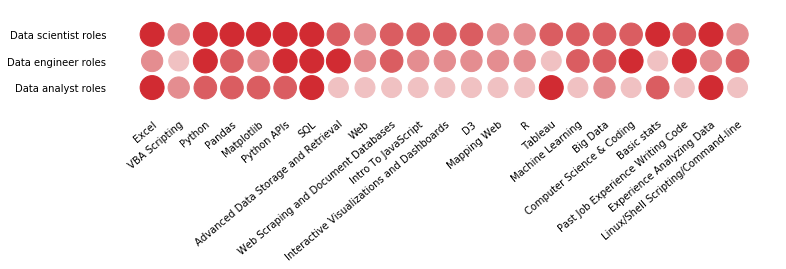

In [20]:
plt.figure(figsize=(12,2))


ax = plt.axes()
ax.set_xticks(np.arange(0,len(df)))
ax.set_xticklabels(df['Material'], rotation=40, ha="right",
         rotation_mode="anchor")
ax.set_yticks(np.arange(0,5))
ax.set_yticklabels(['','Data analyst roles', 'Data engineer roles', 'Data scientist roles'])

sci_line = 3
eng_line = 2
an_line = 1

role_loop(df['Data scientist roles'], sci_line)
role_loop(df['Data engineer roles'], eng_line)
role_loop(df['Data analyst roles'], an_line)

plt.box(on=None)
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.gca().set_aspect('equal', adjustable='datalim')  # prevents circles from being ovals
plt.gca().plot()  # makes axis update

plt.savefig('Role_Heatmap.png', bbox_inches='tight')